<a href="https://colab.research.google.com/github/shajeeraza12/Machine-Learning/blob/main/MLT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

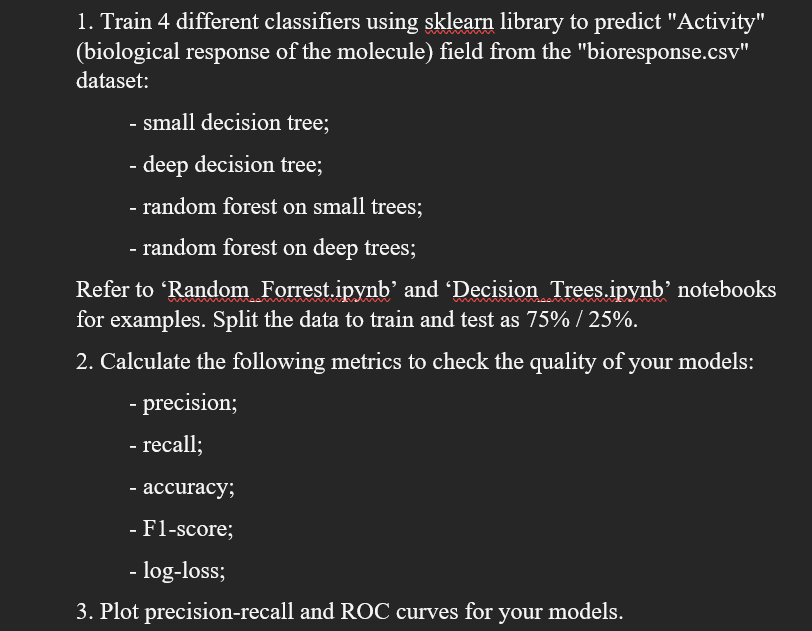

# Importing necessary libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss, roc_auc_score, precision_recall_curve, roc_curve
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Loading the dataset

In [20]:
file_path = "/content/bioresponse.csv"
data = pd.read_csv(file_path, on_bad_lines="skip")

# Check for missing values in the target column
if data["Activity"].isnull().sum() > 0:
    print(f"Missing values in 'Activity': {data['Activity'].isnull().sum()}")
    data = data.dropna(subset=["Activity"])

# Verify there are no NaN values in the target column
assert data["Activity"].isnull().sum() == 0, "There are still NaN values in the target column."

X = data.drop(columns=["Activity"])
y = data["Activity"]

# Handle missing values in features (if any)
if X.isnull().sum().any():
    print("Missing values detected in features. Imputing with column mean.")
    X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Missing values in 'Activity': 1
Missing values detected in features. Imputing with column mean.
Training set: (5300, 1776), Test set: (1767, 1776)


# Small decision tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

clf = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
logloss = log_loss(y_test, y_proba_rf_deep)

# Print the metrics
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print(f"Log-Loss: {logloss:.4f}")


Accuracy: 0.8160724391624222
F1-Score: 0.8148768988999476
Precision: 0.8149059912825936
Recall: 0.814848337162617
Log-Loss: 0.2249


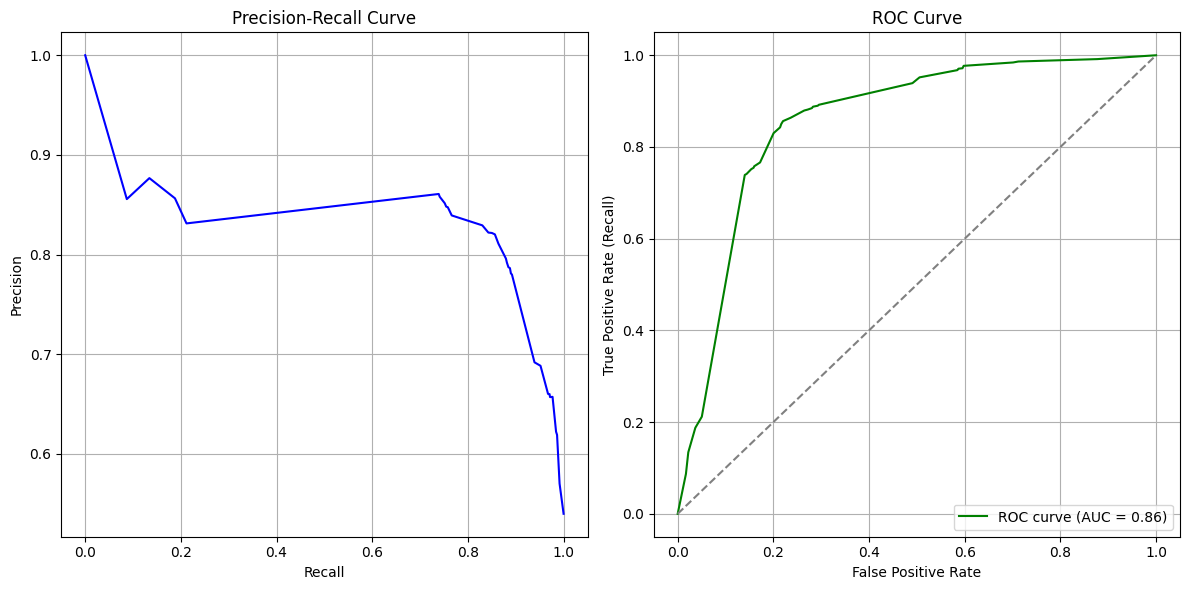

In [59]:
y_proba = clf.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Calculate ROC Curve values
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Calculate AUC (Area Under the Curve) for ROC curve
roc_auc = auc(fpr, tpr)

# Plot Precision-Recall Curve
plt.figure(figsize=(12, 6))

# Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()

# Deep Decision Tree

In [60]:
clf_deep = DecisionTreeClassifier(max_depth=30, min_samples_split=15, min_samples_leaf=15, random_state=42)
clf_deep.fit(X_train, y_train)

# Make predictions on the test set
y_pred_deep = clf_deep.predict(X_test)

# Evaluate the model using accuracy score
accuracy_deep = accuracy_score(y_test, y_pred_deep)

# Evaluate the model using precision, recall, and F1-score
f1_deep = f1_score(y_test, y_pred_deep, average="macro")
precision_deep = precision_score(y_test, y_pred_deep, average="macro")
recall_deep = recall_score(y_test, y_pred_deep, average="macro")
logloss = log_loss(y_test, y_proba_rf_deep)

# Print the metrics
print("Deep Decision Tree:")
print("Accuracy:", accuracy_deep)
print("F1-Score:", f1_deep)
print("Precision:", precision_deep)
print("Recall:", recall_deep)
print(f"Log-Loss: {logloss:.4f}")

Deep Decision Tree:
Accuracy: 0.7923033389926429
F1-Score: 0.7907136607722329
Precision: 0.7911330144777663
Recall: 0.7903815358908306
Log-Loss: 0.2249


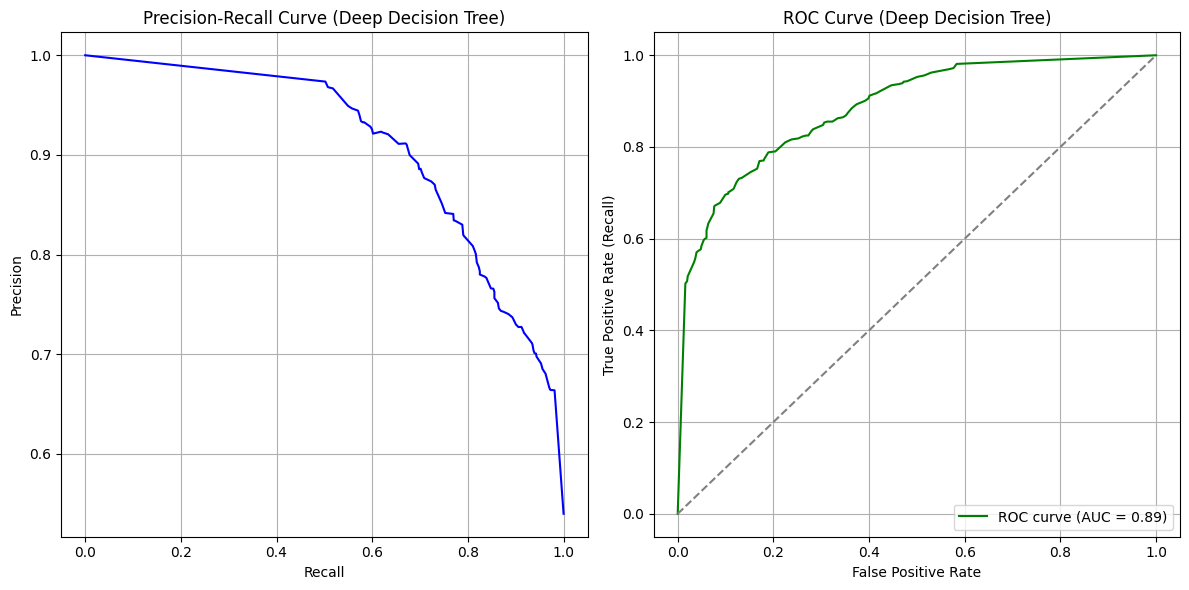

In [61]:
# Get the predicted probabilities for the positive class from the deep decision tree model
y_proba_deep = clf_deep.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall values
precision_deep, recall_deep, _ = precision_recall_curve(y_test, y_proba_deep)

# Calculate ROC Curve values
fpr_deep, tpr_deep, _ = roc_curve(y_test, y_proba_deep)

# Calculate AUC (Area Under the Curve) for ROC curve
roc_auc_deep = auc(fpr_deep, tpr_deep)

# Plot Precision-Recall Curve
plt.figure(figsize=(12, 6))

# Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall_deep, precision_deep, color='blue')
plt.title('Precision-Recall Curve (Deep Decision Tree)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr_deep, tpr_deep, color='green', label=f'ROC curve (AUC = {roc_auc_deep:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve (Deep Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()

# Random Forest on Small Trees

In [62]:
# Train a Random Forest classifier with small trees (max_depth=5 for small trees)
rf_small_trees = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
rf_small_trees.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_small = rf_small_trees.predict(X_test)

# Evaluate the model using accuracy score
accuracy_rf_small = accuracy_score(y_test, y_pred_rf_small)

# Evaluate the model using precision, recall, and F1-score
f1_rf_small = f1_score(y_test, y_pred_rf_small, average="macro")
precision_rf_small = precision_score(y_test, y_pred_rf_small, average="macro")
recall_rf_small = recall_score(y_test, y_pred_rf_small, average="macro")
logloss = log_loss(y_test, y_proba_rf_deep)

# Print the metrics
print("Random Forest (Small Trees):")
print("Accuracy:", accuracy_rf_small)
print("F1-Score:", f1_rf_small)
print("Precision:", precision_rf_small)
print("Recall:", recall_rf_small)
print(f"Log-Loss: {logloss:.4f}")

Random Forest (Small Trees):
Accuracy: 0.7640067911714771
F1-Score: 0.7626004698122587
Precision: 0.7624915945494034
Recall: 0.7627217309908948
Log-Loss: 0.2249


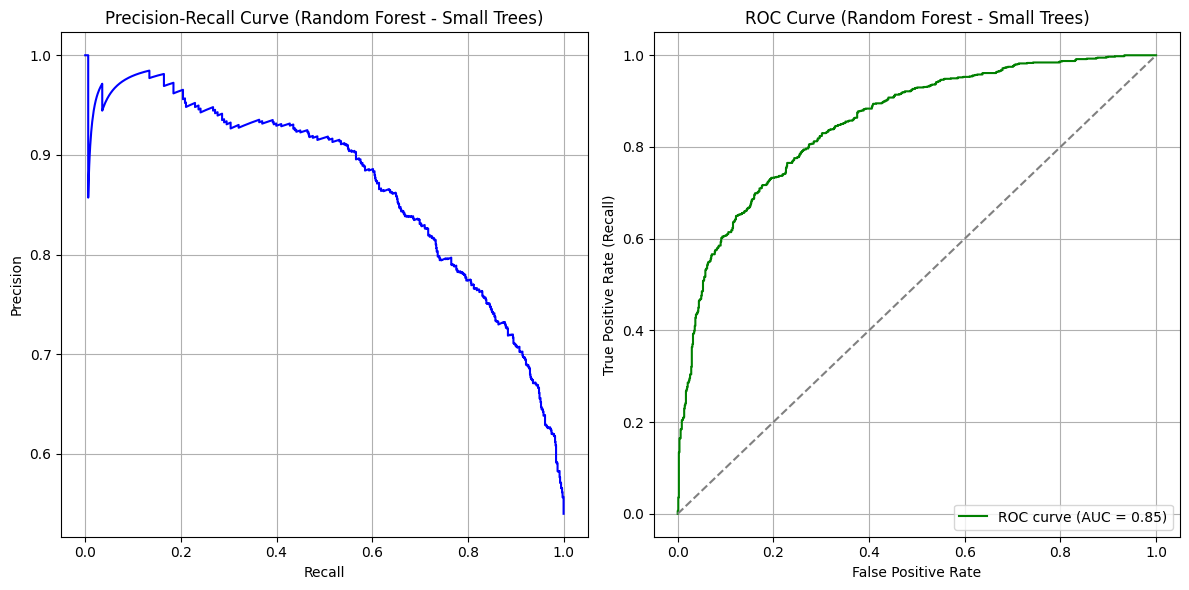

In [63]:
# Get the predicted probabilities for the positive class from the random forest model
y_proba_rf_small = rf_small_trees.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall values
precision_rf_small, recall_rf_small, _ = precision_recall_curve(y_test, y_proba_rf_small)

# Calculate ROC Curve values
fpr_rf_small, tpr_rf_small, _ = roc_curve(y_test, y_proba_rf_small)

# Calculate AUC (Area Under the Curve) for ROC curve
roc_auc_rf_small = auc(fpr_rf_small, tpr_rf_small)

# Plot Precision-Recall Curve
plt.figure(figsize=(12, 6))

# Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall_rf_small, precision_rf_small, color='blue')
plt.title('Precision-Recall Curve (Random Forest - Small Trees)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr_rf_small, tpr_rf_small, color='green', label=f'ROC curve (AUC = {roc_auc_rf_small:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve (Random Forest - Small Trees)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()

# Random Forest on deep trees

In [64]:
# Train a Random Forest classifier with deep trees (max_depth=20 for deeper trees)
rf_deep_trees = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=42)
rf_deep_trees.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_deep = rf_deep_trees.predict(X_test)

# Evaluate the model using accuracy score
accuracy_rf_deep = accuracy_score(y_test, y_pred_rf_deep)

# Evaluate the model using precision, recall, and F1-score
f1_rf_deep = f1_score(y_test, y_pred_rf_deep, average="macro")
precision_rf_deep = precision_score(y_test, y_pred_rf_deep, average="macro")
recall_rf_deep = recall_score(y_test, y_pred_rf_deep, average="macro")
logloss = log_loss(y_test, y_proba_rf_deep)

# Print the metrics
print("Random Forest (Deep Trees):")
print("Accuracy:", accuracy_rf_deep)
print("F1-Score:", f1_rf_deep)
print("Precision:", precision_rf_deep)
print("Recall:", recall_rf_deep)
print(f"Log-Loss: {logloss:.4f}")

Random Forest (Deep Trees):
Accuracy: 0.9496321448783248
F1-Score: 0.9492051956609158
Precision: 0.9503302253302253
Recall: 0.9483549552476658
Log-Loss: 0.2249


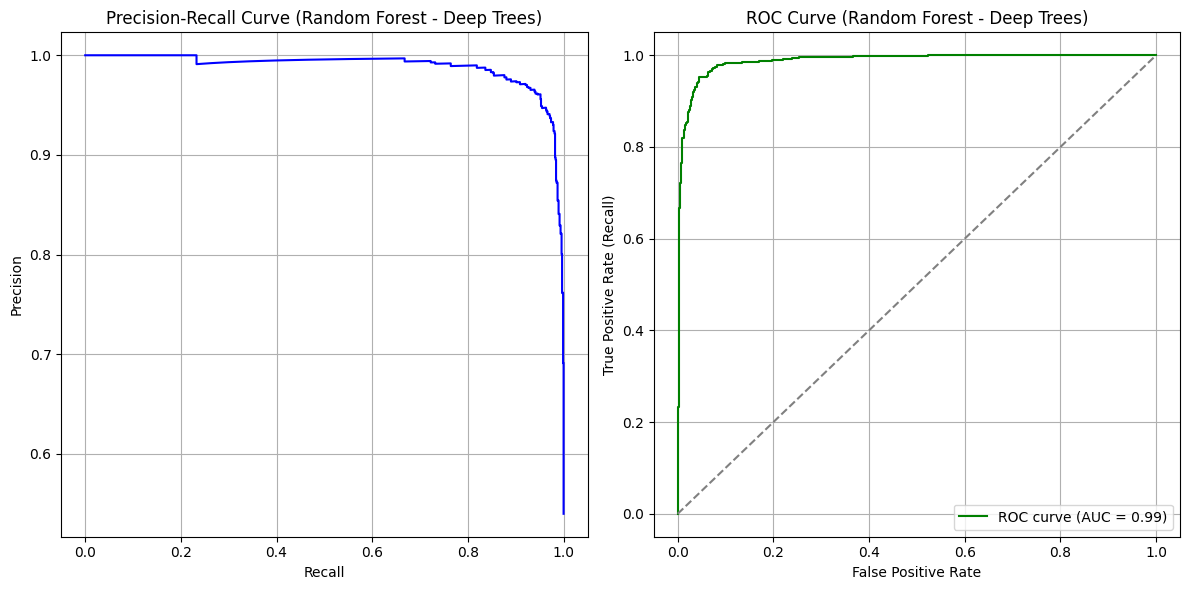

In [57]:
# Get the predicted probabilities for the positive class from the random forest model
y_proba_rf_deep = rf_deep_trees.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall values
precision_rf_deep, recall_rf_deep, _ = precision_recall_curve(y_test, y_proba_rf_deep)

# Calculate ROC Curve values
fpr_rf_deep, tpr_rf_deep, _ = roc_curve(y_test, y_proba_rf_deep)

# Calculate AUC (Area Under the Curve) for ROC curve
roc_auc_rf_deep = auc(fpr_rf_deep, tpr_rf_deep)

# Plot Precision-Recall Curve
plt.figure(figsize=(12, 6))

# Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall_rf_deep, precision_rf_deep, color='blue')
plt.title('Precision-Recall Curve (Random Forest - Deep Trees)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr_rf_deep, tpr_rf_deep, color='green', label=f'ROC curve (AUC = {roc_auc_rf_deep:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve (Random Forest - Deep Trees)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()

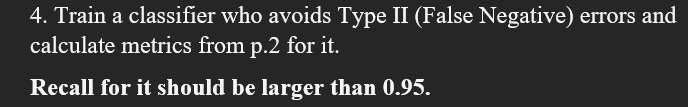

In [81]:
# Train the Random Forest model with class weights (to prioritize detecting the positive class)
clf = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get the predicted probabilities
y_proba = clf.predict_proba(X_test)[:, 1]

# Adjust the threshold for classification to increase recall
threshold = 0.56

# Predict labels based on the adjusted threshold
y_pred = (y_proba >= threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
logloss = log_loss(y_test, y_proba)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Log-Loss: {logloss:.4f}")

Accuracy: 0.9508
F1-Score: 0.9505
Precision: 0.9501
Recall: 0.9510
Log-Loss: 0.2249
